# StackGP.stackGPModelComplexity
```{python}
StackGP.stackGPModelComplexity(model)
```

`stackGPModelComplexity` is a StackGP function that computes the combined stack length for a GP model. This is the default complexity measure used in search. 

The function expects 1 argument: _model_

The argument is described below: 

* **model**: A StackGP model. 


---

First we need to load in the necessary packages

In [1]:
import StackGP as sgp
import numpy as np

## Overview

### Computing complexity for a random model

Here we generate a random model with up to 4 variables, the default operator set, the default constant set, and a maxSize of 10. 

In [2]:
randomModel=sgp.generateRandomModel(4, sgp.defaultOps(), sgp.defaultConst(), 10)

We can display the random model below

In [3]:
sgp.printGPModel(randomModel)

x1 + x2 - 0.865255979432265

Now we can compute the model complexity

In [4]:
sgp.stackGPModelComplexity(randomModel)

7

---
---

## Examples

This section provides some interesting examples to demonstrate how `stackGPModelComplexity` can be used. 

---

### Checking complexity of best evolved model
Likely, we are interested in determining the complexity of models evolved. 

Lets start by generating a training and test set with 4 features. 

In [7]:
trainInputData = np.random.rand(4, 100)
randomModel = sgp.generateRandomModel(4, sgp.defaultOps(), sgp.defaultConst(), 10)
display(sgp.printGPModel(randomModel))
trainResponse = sgp.evaluateGPModel(randomModel, trainInputData)

sqrt(x2*(7.36591123815405 - x1**2))

Now lets evolve a model population using the training data. 

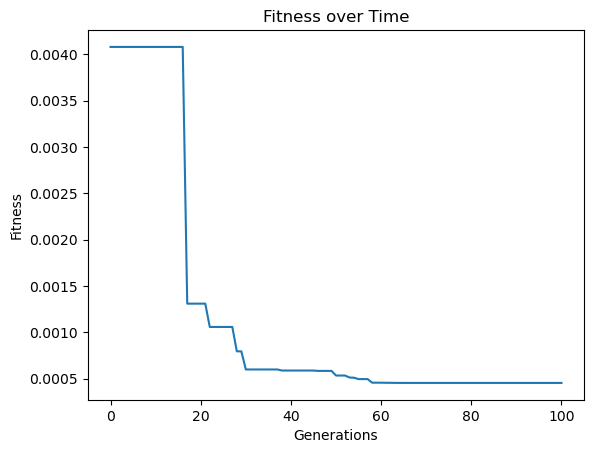

In [8]:
models=sgp.evolve(trainInputData, trainResponse, tracking=True)

Now lets pick the best model evolved from the population. 

In [9]:
bestModel = models[0]
sgp.printGPModel(bestModel)

-0.123761055868954*x1**2 + 2.64444723491903*sqrt(x2) + 0.0476920384907215

Now lets evaluate the complexity of the best model.

In [10]:
sgp.stackGPModelComplexity(models[0])

11

We can also visualize the Pareto front plot of the model population to see the complexity-accuracy trade-off of all models in the population. 

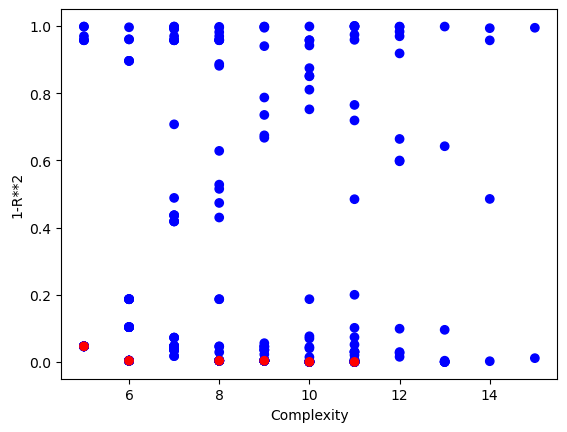

In [11]:
sgp.plotModels(models)

### Using `stackGPModelComplexity` as a Fitness Objective

The default fitness objectives used during search are `fitness` and `stackGPModelComplexity`. Here we show how to manually specify using `stackGPModelComplexity`, although, in practice it isn't necessary.  

We will use a randomly generated model to generate the response. So we start with generating a random model. 

In [12]:
randomModel=sgp.generateRandomModel(4, sgp.defaultOps(), sgp.defaultConst(), 20)
sgp.printGPModel(randomModel)

x3**2*(x2 + x3)

Now we can generate some data and use the above random model to generate the response from the random input data. 

In [13]:
inputData = np.random.rand(4, 100)
response = sgp.evaluateGPModel(randomModel, inputData)

Now we can evolve models to fit the generated training data. We will manually set `fitness` and `stackGPModelComplexity` as the fitness objectives.

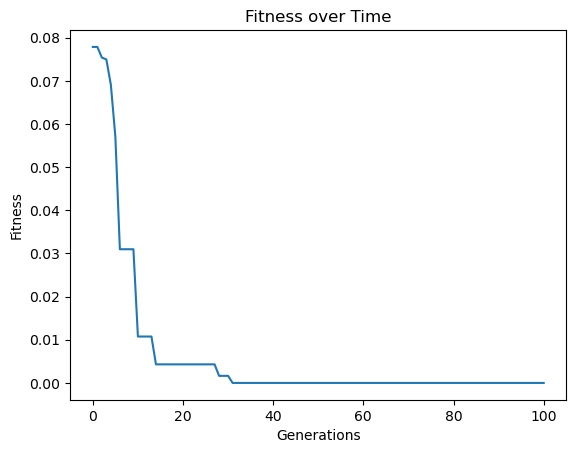

In [14]:
models = sgp.evolve(inputData,response, tracking=True, modelEvaluationMetrics=[sgp.fitness, sgp.stackGPModelComplexity])

Now we can look at the best model generated. 

In [15]:
sgp.printGPModel(models[0])

1.0*x3**2*(x2 + x3) + 1.6678451248621e-17

Now we can view the complexity of that best model. 

In [16]:
sgp.stackGPModelComplexity(models[0])

10

We can also view the Pareto front plot of the evolved model population to see the complexity-accuracy trade-off of all models in the population. 

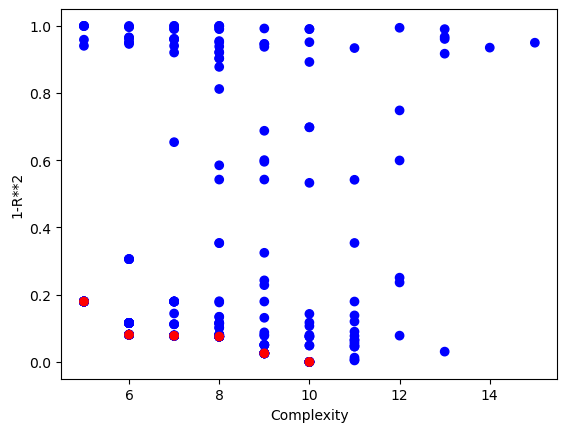

In [17]:
sgp.plotModels(models)

We could also plot the complexity distribution in the population. 

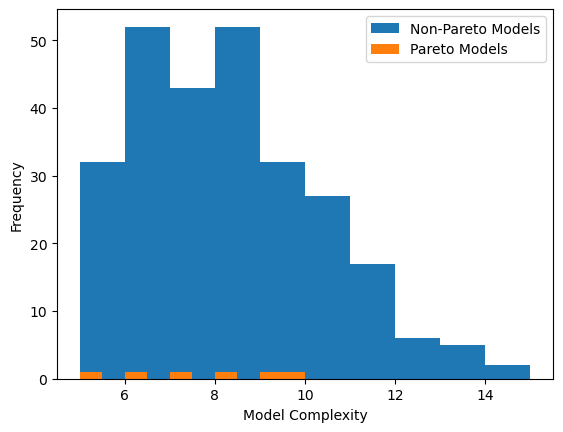

In [18]:
sgp.plotModelComplexityDistribution(models)